In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report


In [2]:
df = pd.read_csv('out1.csv' , sep=';',na_values=[' ?' ])

In [3]:
df.head()

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week,Salary
0,Private,Craft-repair,HS-grad,Male,White,36,Husband,Married-civ-spouse,United-States,55,>50K
1,Private,Prof-specialty,Doctorate,Male,White,47,Husband,Married-civ-spouse,United-States,60,>50K
2,Private,Handlers-cleaners,HS-grad,Female,White,48,Wife,Married-civ-spouse,United-States,16,>50K
3,Private,Adm-clerical,HS-grad,Female,White,46,Wife,Married-civ-spouse,United-States,40,<=50K
4,Private,Craft-repair,Bachelors,Male,White,44,Husband,Married-civ-spouse,United-States,50,>50K


In [4]:
df.shape

(30162, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WorkClass       30162 non-null  object
 1   Occupation      30162 non-null  object
 2   Education       30162 non-null  object
 3   Sexe            30162 non-null  object
 4   Race            30162 non-null  object
 5   Age             30162 non-null  int64 
 6   Relationship    30162 non-null  object
 7   Marital_satus   30162 non-null  object
 8   Native_Country  30162 non-null  object
 9   Hours_per_week  30162 non-null  int64 
 10  Salary          30162 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [6]:
# - Number of uniques values in dataframe

pd.DataFrame({'': df.nunique().index , 'Number of unique values':  df.nunique().values})

,,Number of unique values
0,WorkClass,7
1,Occupation,14
2,Education,16
3,Sexe,2
4,Race,5
5,Age,72
6,Relationship,6
7,Marital_satus,7
8,Native_Country,41
9,Hours_per_week,94


In [7]:
df.loc[: , df.dtypes == object].apply(lambda e : e.unique())

WorkClass         [ Private,  Local-gov,  Federal-gov,  Self-emp...
Occupation        [ Craft-repair,  Prof-specialty,  Handlers-cle...
Education         [ HS-grad,  Doctorate,  Bachelors,  11th,  7th...
Sexe                                               [ Male,  Female]
Race              [ White,  Black,  Asian-Pac-Islander,  Amer-In...
Relationship      [ Husband,  Wife,  Own-child,  Not-in-family, ...
Marital_satus     [ Married-civ-spouse,  Never-married,  Divorce...
Native_Country    [ United-States,  Cuba,  Puerto-Rico,  Ireland...
Salary                                              [ >50K,  <=50K]
dtype: object

In [8]:
for col in df.loc[: , df.dtypes == object].columns:
    df[col] = df[col].str.strip()

In [9]:
df.Salary.unique()

array(['>50K', '<=50K'], dtype=object)

In [10]:
# - formatting the target column

df['Salary']= df['Salary'].map({'<=50K': 0, '>50K': 1})
df

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week,Salary
0,Private,Craft-repair,HS-grad,Male,White,36,Husband,Married-civ-spouse,United-States,55,1
1,Private,Prof-specialty,Doctorate,Male,White,47,Husband,Married-civ-spouse,United-States,60,1
2,Private,Handlers-cleaners,HS-grad,Female,White,48,Wife,Married-civ-spouse,United-States,16,1
3,Private,Adm-clerical,HS-grad,Female,White,46,Wife,Married-civ-spouse,United-States,40,0
4,Private,Craft-repair,Bachelors,Male,White,44,Husband,Married-civ-spouse,United-States,50,1
...,...,...,...,...,...,...,...,...,...,...,...
30157,Private,Craft-repair,HS-grad,Male,White,45,Husband,Married-civ-spouse,United-States,40,0
30158,Private,Tech-support,Some-college,Male,White,35,Husband,Married-civ-spouse,United-States,40,0
30159,Private,Other-service,11th,Female,Black,45,Not-in-family,Widowed,United-States,20,0
30160,Private,Adm-clerical,Bachelors,Female,White,34,Not-in-family,Never-married,United-States,40,0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,30162.0,38.437902,13.134665,17.0,28.0,37.0,47.0,90.0
Hours_per_week,30162.0,40.931238,11.979984,1.0,40.0,40.0,45.0,99.0
Salary,30162.0,0.248922,0.432396,0.0,0.0,0.0,0.0,1.0


# 3) Data Analysis

In [12]:
# To put percentage numbers above chart ( With hue , Without hue)

def percen (plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.0f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def percen_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.0f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [13]:
df.Salary.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

0    75.0 %
1    25.0 %
Name: Salary, dtype: object

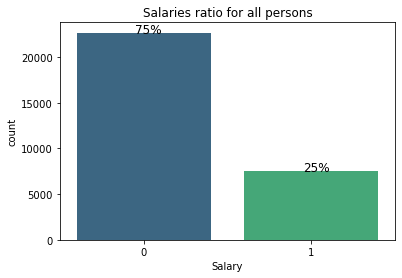

In [14]:
ax = sns.countplot( x=df.Salary , data= df , palette='viridis')
ax.set_title('Salaries ratio for all persons')
percen(ax , df.Salary)

In [15]:
df.Sexe.value_counts(normalize=True).mul(100).round(0).astype(str) + ' %'

Male      68.0 %
Female    32.0 %
Name: Sexe, dtype: object

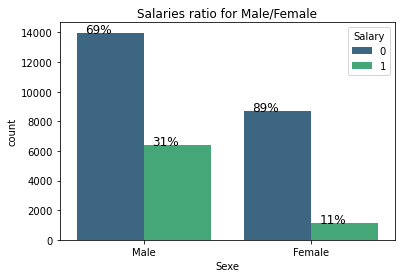

In [16]:
ax = sns.countplot(data=df, x='Sexe', hue='Salary', palette='viridis')
ax.set_title('Salaries ratio for Male/Female')
percen_hue(ax,df.Sexe , 2,2)

In [17]:
df.Race.value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: Race, dtype: int64

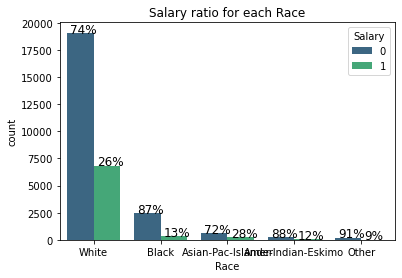

In [18]:
ax = sns.countplot(data=df, x='Race', hue='Salary', palette='viridis')
ax.set_title('Salary ratio for each Race')
percen_hue(ax,df.Race , 5,2)

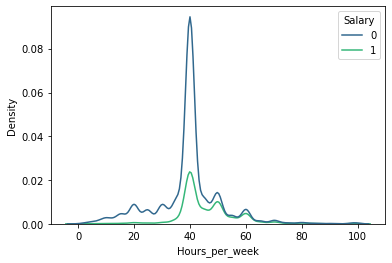

In [19]:
sns.kdeplot(data=df, x='Hours_per_week', hue='Salary', palette='viridis');


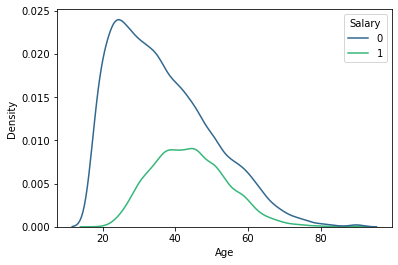

In [20]:
sns.kdeplot(data=df, x='Age', hue='Salary', palette='viridis');

In [21]:
pd.DataFrame({'Native Country': df.groupby('Native_Country')['Salary'].mean().index , 'Mean salary':  df.groupby('Native_Country')['Salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1].head(100)

,Native Country,Mean salary
35,Taiwan,0.452381
9,France,0.444444
19,Iran,0.428571
18,India,0.400000
23,Japan,0.389831
0,Cambodia,0.388889
40,Yugoslavia,0.375000
21,Italy,0.352941
8,England,0.348837
10,Germany,0.343750


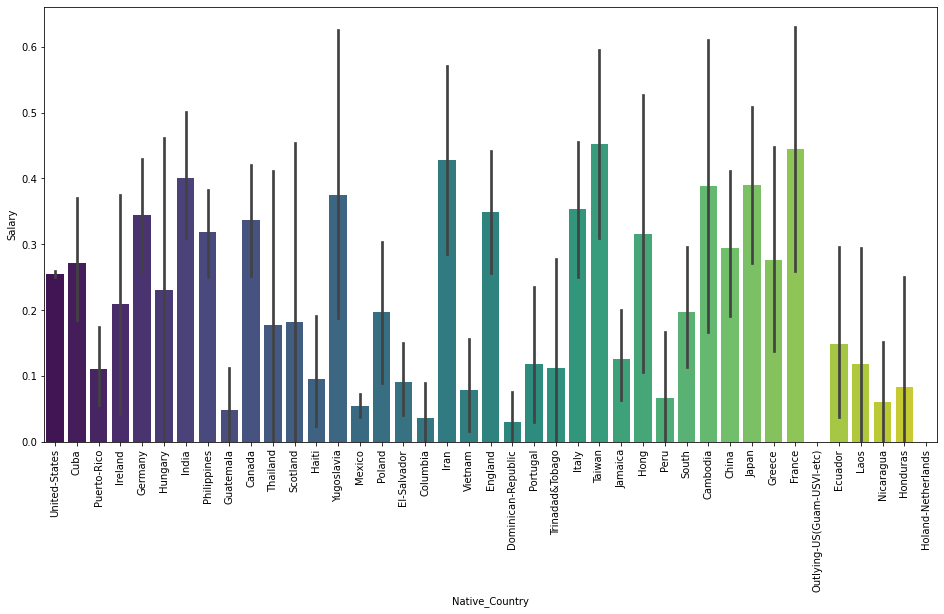

In [22]:
plt.figure(figsize=(16,8))
plt.xticks(rotation = 90)
sns.barplot(data=df, x="Native_Country", y="Salary" , palette='viridis');


In [23]:
pd.DataFrame({'Occupattion': df.groupby('Occupation')['Salary'].mean().index , 'Mean salary':  df.groupby('Occupation')['Salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Occupattion,Mean salary
3,Exec-managerial,0.485220
9,Prof-specialty,0.448489
10,Protective-serv,0.326087
12,Tech-support,0.304825
11,Sales,0.270647
2,Craft-repair,0.225310
13,Transport-moving,0.202926
0,Adm-clerical,0.133835
6,Machine-op-inspct,0.124619
4,Farming-fishing,0.116279


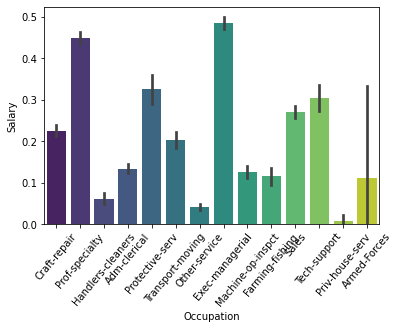

In [24]:
plt.xticks(rotation = 50)
sns.barplot(data=df, x="Occupation", y="Salary" , palette='viridis');

In [25]:
pd.DataFrame({'Marital Status': df.groupby('Marital_satus')['Salary'].mean().index , 'Mean salary':  df.groupby('Marital_satus')['Salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Marital Status,Mean salary
1,Married-AF-spouse,0.476190
2,Married-civ-spouse,0.454959
0,Divorced,0.107262
6,Widowed,0.096735
3,Married-spouse-absent,0.083784
5,Separated,0.070288
4,Never-married,0.048324


<AxesSubplot:xlabel='Marital_satus', ylabel='Salary'>

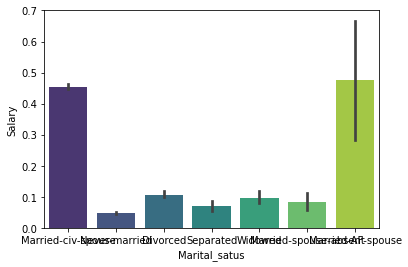

In [26]:
plt.xticks(rotation = 0)
sns.barplot(data=df, x="Marital_satus", y="Salary" , palette='viridis')

In [27]:
pd.DataFrame({'Relationship': df.groupby('Relationship')['Salary'].mean().index , 'Mean salary':  df.groupby('Relationship')['Salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Relationship,Mean salary
5,Wife,0.493599
0,Husband,0.455669
1,Not-in-family,0.106523
4,Unmarried,0.066314
2,Other-relative,0.039370
3,Own-child,0.014330


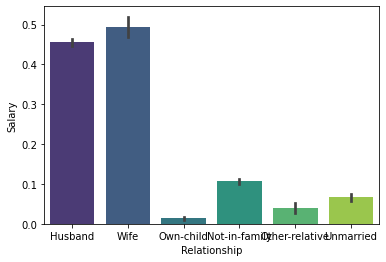

In [28]:
sns.barplot(data=df, x="Relationship", y="Salary" , palette='viridis');

In [29]:
pd.DataFrame({'Workclass': df.groupby('WorkClass')['Salary'].mean().index , 'Mean salary':  df.groupby('WorkClass')['Salary'].mean().values}).sort_values(by='Mean salary'  , axis=0)[::-1]

,Workclass,Mean salary
3,Self-emp-inc,0.558659
0,Federal-gov,0.387063
1,Local-gov,0.294630
4,Self-emp-not-inc,0.285714
5,State-gov,0.268960
2,Private,0.218792
6,Without-pay,0.000000


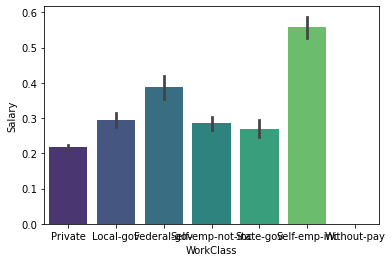

In [30]:
sns.barplot(data=df, x="WorkClass", y="Salary" , palette='viridis');

# 4 ) Data Preprocessing

In [31]:
df.head()

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week,Salary
0,Private,Craft-repair,HS-grad,Male,White,36,Husband,Married-civ-spouse,United-States,55,1
1,Private,Prof-specialty,Doctorate,Male,White,47,Husband,Married-civ-spouse,United-States,60,1
2,Private,Handlers-cleaners,HS-grad,Female,White,48,Wife,Married-civ-spouse,United-States,16,1
3,Private,Adm-clerical,HS-grad,Female,White,46,Wife,Married-civ-spouse,United-States,40,0
4,Private,Craft-repair,Bachelors,Male,White,44,Husband,Married-civ-spouse,United-States,50,1


In [32]:
df.isnull().sum()

WorkClass         0
Occupation        0
Education         0
Sexe              0
Race              0
Age               0
Relationship      0
Marital_satus     0
Native_Country    0
Hours_per_week    0
Salary            0
dtype: int64

In [33]:
# Fill NaN values by MODE

df['WorkClass'].fillna(df['WorkClass'].value_counts().idxmax() , axis=0 ,inplace=True)
df['Occupation'].fillna(df['Occupation'].value_counts().idxmax() , axis=0 ,inplace=True)
df['Native_Country'].fillna(df['Native_Country'].value_counts().idxmax() , axis=0 ,inplace=True)

In [34]:
df.isnull().sum()

WorkClass         0
Occupation        0
Education         0
Sexe              0
Race              0
Age               0
Relationship      0
Marital_satus     0
Native_Country    0
Hours_per_week    0
Salary            0
dtype: int64

In [35]:
df['Sexe']= df['Sexe'].map({'Female': 0, 'Male': 1})
df['Sexe'].value_counts()


1    20380
0     9782
Name: Sexe, dtype: int64

In [36]:
df['Education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

In [37]:
# Formating [ Education ] column

int_list = list(df[df['Education'].str.contains('th')]['Education'].unique())
int_list.append('Preschool')
df['Education'] =  df['Education'].replace(int_list , 'Low Education')

df['Education'] =  df['Education'].replace('HS-grad' , 'Intermediate Education')

hg_list= list(set(df[df['Education'].str.contains('-')]['Education']))
df['Education'] =  df['Education'].replace(hg_list , 'Above Intermediate')

In [38]:
df['Education'].value_counts()

Intermediate Education    9840
Above Intermediate        9535
Bachelors                 5044
Low Education             3741
Masters                   1627
Doctorate                  375
Name: Education, dtype: int64

In [39]:
df['Marital_satus'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_satus, dtype: int64

In [40]:
# Formating [ marital-status ] column

df['Marital_satus'] =  df['Marital_satus'].replace(['Married-civ-spouse' , 'Married-spouse-absent' , 'Married-AF-spouse' ] , 'Married')
df['Marital_satus'] =  df['Marital_satus'].replace(['Divorced' , 'Separated' , 'Widowed' ] , 'Other')

In [41]:
df['Marital_satus'].value_counts()

Married          14456
Never-married     9726
Other             5980
Name: Marital_satus, dtype: int64

In [42]:
df.head()

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week,Salary
0,Private,Craft-repair,Intermediate Education,1,White,36,Husband,Married,United-States,55,1
1,Private,Prof-specialty,Doctorate,1,White,47,Husband,Married,United-States,60,1
2,Private,Handlers-cleaners,Intermediate Education,0,White,48,Wife,Married,United-States,16,1
3,Private,Adm-clerical,Intermediate Education,0,White,46,Wife,Married,United-States,40,0
4,Private,Craft-repair,Bachelors,1,White,44,Husband,Married,United-States,50,1


In [43]:
# Converting categorical features

nums = []
lbl= LabelEncoder()
for col in df.loc[: , df.dtypes == object].columns:
    df[col] = lbl.fit_transform(df[col])
    # To know the meaning of numbers
    directory = {index: label for index, label in enumerate(lbl.classes_)}
    nums.append(directory)

In [44]:
df

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week,Salary
0,2,2,3,1,4,36,0,0,38,55,1
1,2,9,2,1,4,47,0,0,38,60,1
2,2,5,3,0,4,48,5,0,38,16,1
3,2,0,3,0,4,46,5,0,38,40,0
4,2,2,1,1,4,44,0,0,38,50,1
...,...,...,...,...,...,...,...,...,...,...,...
30157,2,2,3,1,4,45,0,0,38,40,0
30158,2,12,0,1,4,35,0,0,38,40,0
30159,2,7,4,0,2,45,1,2,38,20,0
30160,2,0,1,0,4,34,1,1,38,40,0


# 5 ) Modeling

In [45]:
x = df.drop([ 'Salary' ] , axis=1)
y = df['Salary']

In [46]:
std  = MinMaxScaler()
x = pd.DataFrame(std.fit_transform(x) , columns=x.columns)
x

,WorkClass,Occupation,Education,Sexe,Race,Age,Relationship,Marital_satus,Native_Country,Hours_per_week
0,0.333333,0.153846,0.6,1.0,1.0,0.260274,0.0,0.0,0.95,0.551020
1,0.333333,0.692308,0.4,1.0,1.0,0.410959,0.0,0.0,0.95,0.602041
2,0.333333,0.384615,0.6,0.0,1.0,0.424658,1.0,0.0,0.95,0.153061
3,0.333333,0.000000,0.6,0.0,1.0,0.397260,1.0,0.0,0.95,0.397959
4,0.333333,0.153846,0.2,1.0,1.0,0.369863,0.0,0.0,0.95,0.500000
...,...,...,...,...,...,...,...,...,...,...
30157,0.333333,0.153846,0.6,1.0,1.0,0.383562,0.0,0.0,0.95,0.397959
30158,0.333333,0.923077,0.0,1.0,1.0,0.246575,0.0,0.0,0.95,0.397959
30159,0.333333,0.538462,0.8,0.0,0.5,0.383562,0.2,1.0,0.95,0.193878
30160,0.333333,0.000000,0.2,0.0,1.0,0.232877,0.2,0.5,0.95,0.397959


In [47]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8 , random_state=44)

In [48]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24129, 10)
(6033, 10)
(24129,)
(6033,)


# Random Forest

In [49]:
rfc = RandomForestClassifier()

model = rfc.fit(x_train , y_train)
pred = model.predict(x_test)

print("Accuracy on Test Data : {:,.2f}".format(rfc.score(x_test , y_test) *100 ) , '%')

Accuracy on Test Data : 81.02 %


In [50]:
confusion_matrix(y_test , pred)

array([[4023,  449],
       [ 696,  865]], dtype=int64)

In [51]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      4472
           1       0.66      0.55      0.60      1561

    accuracy                           0.81      6033
   macro avg       0.76      0.73      0.74      6033
weighted avg       0.80      0.81      0.80      6033



# hyperparameter tuning

In [52]:
n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
               
# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(x_train, y_train)
# rf_random.best_params_


In [53]:
rfc = RandomForestClassifier(n_estimators=800 , min_samples_split = 10 , min_samples_leaf=4 , max_features='auto' ,max_depth=20 ,bootstrap=False )

model = rfc.fit(x_train , y_train)
pred = model.predict(x_test)

print("Accuracy on Test Data : {:,.2f}".format(rfc.score(x_test , y_test) *100 ) , '%')


Accuracy on Test Data : 83.29 %


In [54]:
confusion_matrix(y_test , pred)

array([[4138,  334],
       [ 674,  887]], dtype=int64)

In [55]:
print(classification_report(y_test , pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4472
           1       0.73      0.57      0.64      1561

    accuracy                           0.83      6033
   macro avg       0.79      0.75      0.76      6033
weighted avg       0.83      0.83      0.83      6033

